##                                                  Yağmur Tahmin Projesi   ( Anıl ÇERİBAŞI ) 31.Dönem                                                                ##


Hava Tahmini; Belirli bir ülke, bölge veya merkezde, bir zaman dilimi içinde görülebilecek meteorolojik olayların gözlem ve analizlere dayanılarak subjektif veya objektif yöntemler kullanılarak önceden öngörülme çalışmalarıdır.

Projede belli bölge ve yıllara ait rüzgar hızı,rüzgar yönü,max sıcaklık gibi parametreleri kullanarak yağmur tahmini ile ilgili sınıflandırma modeli oluşturulmuştur.

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("Rain_Predict.csv")

In [2]:
data.head()

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,1/1/2009,Darwin,24.5,31.5,4.2,3.4,WNW,39.0,W,WNW,24.0,24.0,74.0,72.0,1004.1,1002.2,29.0,30.5,Yes
1,1/1/2009,Townsville,24.8,31.9,6.4,4.8,NNW,39.0,NNW,N,2.0,19.0,77.0,69.0,1008.0,1005.4,28.8,29.9,Yes
2,1/2/2009,Cairns,23.5,31.6,5.6,10.6,NNE,28.0,SE,NNE,9.0,11.0,68.0,70.0,1008.8,1006.8,30.1,30.5,Yes
3,1/2/2009,MelbourneAirport,7.8,17.8,7.2,12.9,SSE,56.0,SW,SSE,31.0,26.0,50.0,43.0,1018.0,1019.3,12.5,15.8,Yes
4,1/3/2009,Townsville,25.3,31.3,4.8,4.8,ESE,35.0,N,E,9.0,11.0,90.0,70.0,1010.1,1007.5,25.7,29.7,Yes


In [3]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
17713,12/31/2016,Cairns,23.0,32.0,13.6,NaN,NNE,31.0,SE,NE,11.0,17.0,67.0,64.0,1004.8,1002.4,29.7,31.0,Yes
17714,12/31/2016,MelbourneAirport,16.0,25.2,8.6,11.9,SSE,41.0,SW,SSE,11.0,20.0,59.0,48.0,1006.3,1005.4,18.6,23.5,No
17715,12/31/2016,SydneyAirport,22.6,26.3,8.2,4.8,S,39.0,S,SE,22.0,22.0,83.0,75.0,1003.9,1003.8,24.2,25.5,No
17716,12/31/2016,PerthAirport,12.1,28.9,8.0,13.2,SW,48.0,SSE,WSW,15.0,31.0,46.0,35.0,1016.1,1012.9,20.3,27.4,No
17717,12/31/2016,Brisbane,24.5,33.9,8.0,13.1,NE,31.0,N,NE,6.0,15.0,58.0,57.0,1007.0,1003.4,30.6,31.9,No


In [4]:
# Veri setinin incelenmesi;

print('Data Types:')
print(data.dtypes.value_counts())
print()
print(data.info())

Data Types:
float64    13
object      6
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17718 entries, 0 to 17717
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           17718 non-null  object 
 1   Location       17718 non-null  object 
 2   MinTemp        17706 non-null  float64
 3   MaxTemp        17713 non-null  float64
 4   Evaporation    17076 non-null  float64
 5   Sunshine       16539 non-null  float64
 6   WindGustDir    17545 non-null  object 
 7   WindGustSpeed  17557 non-null  float64
 8   WindDir9am     17214 non-null  object 
 9   WindDir3pm     17644 non-null  object 
 10  WindSpeed9am   17691 non-null  float64
 11  WindSpeed3pm   17690 non-null  float64
 12  Humidity9am    17690 non-null  float64
 13  Humidity3pm    17695 non-null  float64
 14  Pressure9am    17705 non-null  float64
 15  Pressure3pm    17708 non-null  float64
 16  Temp9am        17699 non-null  float64
 

In [5]:
# Verilerin Location bazında gruplandırılarak dağılımı;

data.groupby('Location').size()

Location
AliceSprings        1035
Brisbane            1178
Cairns              1146
Darwin              1177
MelbourneAirport    1152
Mildura             1187
MountGambier        1176
NorfolkIsland       1210
Nuriootpa           1200
Perth               1240
PerthAirport        1201
SydneyAirport       1211
Townsville          1213
WaggaWagga          1198
Watsonia            1194
dtype: int64

In [6]:
# Veri setinin genel istatistik bilgileri;

data.describe()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,17706.000000,17713.000000,17076.000000,16539.000000,17557.000000,17691.000000,17690.000000,17690.000000,17695.000000,17705.000000,17708.000000,17699.000000,17706.000000
mean,14.135304,24.416671,5.438001,7.394304,40.612405,15.178057,19.742453,67.909101,52.279005,1016.826168,1014.443686,18.789751,22.881046
std,6.636691,6.989565,3.553855,3.866386,13.192874,8.521436,8.418503,19.341067,20.969997,6.858421,6.795851,6.759155,6.843966
min,-5.000000,6.600000,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000,1.000000,980.500000,979.000000,0.000000,5.300000
25%,8.900000,18.900000,2.800000,4.400000,31.000000,9.000000,13.000000,56.000000,39.000000,1012.200000,1009.700000,13.400000,17.500000
50%,14.000000,24.400000,4.800000,8.200000,39.000000,15.000000,19.000000,69.000000,53.000000,1016.700000,1014.200000,18.500000,22.800000
75%,19.500000,30.100000,7.600000,10.600000,48.000000,20.000000,26.000000,82.000000,66.000000,1021.300000,1019.000000,24.400000,28.300000
max,31.900000,45.500000,50.200000,14.500000,135.000000,65.000000,65.000000,100.000000,100.000000,1038.800000,1036.900000,39.400000,43.600000


In [7]:
# Öznitelikleri daha iyi anlamak adına kolerasyonlara bakalım.Büyük miktarda veriyi özetlemek için kullanırız.

data.corr()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.738819,0.457465,0.025393,0.104102,0.113693,0.157813,-0.117546,0.145016,-0.505079,-0.542555,0.906565,0.719084
MaxTemp,0.738819,1.000000,0.638622,0.445726,-0.004515,-0.025429,0.023973,-0.508206,-0.416948,-0.344604,-0.461458,0.897405,0.985841
Evaporation,0.457465,0.638622,1.000000,0.395147,0.168716,0.167873,0.138098,-0.571277,-0.413900,-0.269381,-0.312764,0.579345,0.617231
Sunshine,0.025393,0.445726,0.395147,1.000000,-0.079192,-0.026280,0.037064,-0.556555,-0.665511,0.099635,0.029261,0.260970,0.465307
WindGustSpeed,0.104102,-0.004515,0.168716,-0.079192,1.000000,0.642707,0.695396,-0.104477,0.029524,-0.411311,-0.355723,0.058907,-0.035810
WindSpeed9am,0.113693,-0.025429,0.167873,-0.026280,0.642707,1.000000,0.557737,-0.173739,0.011939,-0.218491,-0.168742,0.055420,-0.036547
WindSpeed3pm,0.157813,0.023973,0.138098,0.037064,0.695396,0.557737,1.000000,-0.073840,0.041084,-0.293510,-0.248188,0.125104,0.006117
Humidity9am,-0.117546,-0.508206,-0.571277,-0.556555,-0.104477,-0.173739,-0.073840,1.000000,0.709242,0.015264,0.088529,-0.401895,-0.499178
Humidity3pm,0.145016,-0.416948,-0.413900,-0.665511,0.029524,0.011939,0.041084,0.709242,1.000000,-0.158913,-0.074746,-0.110399,-0.459589
Pressure9am,-0.505079,-0.344604,-0.269381,0.099635,-0.411311,-0.218491,-0.293510,0.015264,-0.158913,1.000000,0.961924,-0.450621,-0.309325


Sunshine ve Cloud3pm arasında negatif yönlü kuvvetli bir ilişki gözüküyor.
Sunshine arttıkça Cloud3pm azalmaktadır diyebililirz.

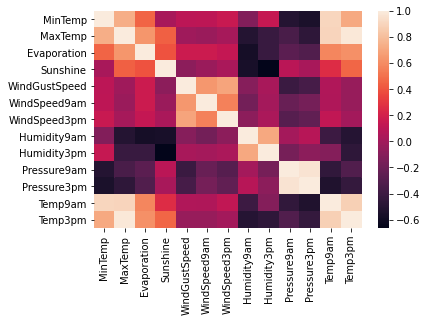

In [8]:
# Isı haritası yardımı ile özniteliklerin arasındaki ilişkinin görselleştirilmesi;

import seaborn as sb

corr = data.corr()
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Evaporation ile Temp9am ve Temp3pm arasında da pozitif bir ilişki gözüküyor.

Verilerin birbiri ile yüksek oranda ilişkili olduğunu söyleyebiliriz.
Özellikler için RainToday Yes ve No grupları arasındaki kolerasyon farkına bakmak ve 
veri dağılımı arasında bir fark olup olmadığını anlamak adına bazı öznitelikleri kullanarak kutu grafiğine bakalım.

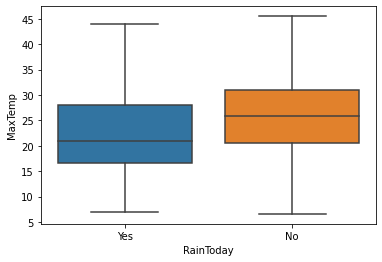

In [9]:
import seaborn as sb
plot = sb.boxplot(x='RainToday', y='MaxTemp', data=data, showfliers=True)


Grafikte de görüldüğü üzere MaxTemp değerlerinin RainToday Yes ve No arasında çok fark yaratmadığı gözükmektedir.
RainToday No olduğu zaman MaxTemp dağılımı biraz daha yüksek diyebiliriz.

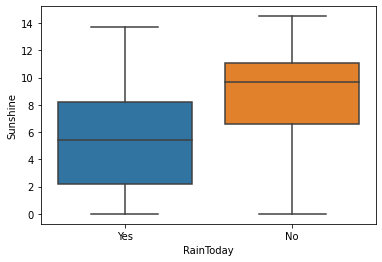

In [10]:
plot = sb.boxplot(x='RainToday', y='Sunshine', data=data, showfliers=True)


RainToday Yes, Sunshine için daha düşük ortalamaya sahip gözüküyor. Ancak IQR daha geniş.

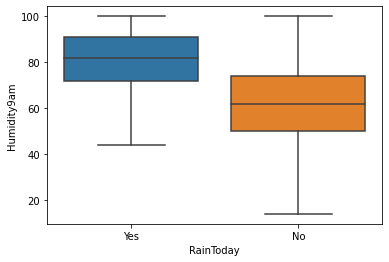

In [11]:
plot = sb.boxplot(x='RainToday', y='Humidity9am', data=data, showfliers=False)

Humidity9am için RainToday No ile Yes birbirinden farklı değer aralıklarına sahip gözüküyor
Bu sınıflandırma problemi için iyi bir özellik.

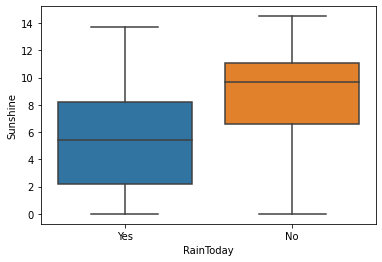

In [12]:
plot = sb.boxplot(x='RainToday', y='Sunshine', data=data, showfliers=False)

Yukarıdaki örnek olarak baktığımız kutu grafiklerinden ortalamalar arasında belirgin bir fark olduğu görülebiliyor.

Veri kümesinde yer alan tüm öznitelikler arasındaki kovaryans değerlerini içeren matris;

In [13]:
data.cov()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,44.045672,34.271650,10.747845,0.649578,9.110748,6.427997,8.810949,-15.088959,20.187058,-22.995728,-24.473726,40.666580,32.660154
MaxTemp,34.271650,48.854019,15.886511,12.053031,-0.416489,-1.514457,1.410452,-68.691912,-61.114611,-16.518972,-21.917643,42.390446,47.153728
Evaporation,10.747845,15.886511,12.629883,5.136192,7.840171,5.058202,4.127665,-39.150700,-30.701478,-6.536805,-7.530801,13.914878,15.031843
Sunshine,0.649578,12.053031,5.136192,14.948943,-4.060138,-0.868874,1.214329,-41.505744,-53.855479,2.656928,0.773697,6.806703,12.320283
WindGustSpeed,9.110748,-0.416489,7.840171,-4.060138,174.051915,72.274075,77.262430,-26.686059,8.171203,-37.238032,-31.905417,5.251348,-3.231875
WindSpeed9am,6.427997,-1.514457,5.058202,-0.868874,72.274075,72.614874,40.026770,-28.620044,2.134137,-12.764155,-9.769331,3.191399,-2.131553
WindSpeed3pm,8.810949,1.410452,4.127665,1.214329,77.262430,40.026770,70.871198,-12.020252,7.253230,-16.937236,-14.193236,7.116517,0.352364
Humidity9am,-15.088959,-68.691912,-39.150700,-41.505744,-26.686059,-28.620044,-12.020252,374.076875,287.525055,2.024325,11.636193,-52.532590,-66.074743
Humidity3pm,20.187058,-61.114611,-30.701478,-53.855479,8.171203,2.134137,7.253230,287.525055,439.740791,-22.851567,-10.651933,-15.644696,-65.969323
Pressure9am,-22.995728,-16.518972,-6.536805,2.656928,-37.238032,-12.764155,-16.937236,2.024325,-22.851567,47.037940,44.839371,-20.892351,-14.515550


Kovaryans bize Sunshine ile Humidity9am arasında negatif , 
MaxTemp ile Evaporation arasında pozitif ilişki olduğunu göstermektedir.

Veri setimizde eksik hücre (NaN) olup olmadığına ve kaç hücrede olduğuna bakalım

In [14]:
data.isnull().sum().sum()

2973

Görüldüğü üzere veri setimizde NaN değerleri yer alıyor.Bu durum oluşturacağımız modelin başarısını etkileyen bir faktör.
NaN değerleri yerine ilgili sütunlardaki verilerin ortalama değerlerini yazabilir veya ilgili satırları silebiliriz.
Öncelikle eksik değerleri ve veri setindeki oranlarını görelim

In [15]:
pd.concat([data.isnull().sum(), 100 * data.isnull().sum()/len(data)], 
              axis=1).rename(columns={0:'Eksik Değer', 1:'% Değeri'})

,Eksik Değer,% Değeri
Date,0,0.000000
Location,0,0.000000
MinTemp,12,0.067728
MaxTemp,5,0.028220
Evaporation,642,3.623434
Sunshine,1179,6.654250
WindGustDir,173,0.976408
WindGustSpeed,161,0.908680
WindDir9am,504,2.844565
WindDir3pm,74,0.417654


Eksik değerlerin oranı düşük olduğu için satır veya sütun silmeden değişkenlerin ortalama değerleri ile doldurabiliriz.

In [16]:

cols = ['MinTemp', 'MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
data[cols] = data[cols].fillna(data[cols].median())


Eksik verilerin oranlarına tekrar bakalım;

In [17]:

pd.concat([data.isnull().sum(), 100 * data.isnull().sum()/len(data)], 
              axis=1).rename(columns={0:'Eksik Değer', 1:'% Değeri'})


,Eksik Değer,% Değeri
Date,0,0.000000
Location,0,0.000000
MinTemp,0,0.000000
MaxTemp,0,0.000000
Evaporation,0,0.000000
Sunshine,0,0.000000
WindGustDir,173,0.976408
WindGustSpeed,0,0.000000
WindDir9am,504,2.844565
WindDir3pm,74,0.417654


Görüldüğü üzere Dtype float64 olan değerler ortalama değerler ile doldurulmuş olup, eksik veri kalmamıştır.

WindGustDir , WindDir9am , WindDir3pm ve RainToday öznitelikleri object olmaması sebebi ile 
manuel ekleme veya Eksik veri olan satırları silme işlemi uygulayabiliriz.

Eksik veri yer alan satırları silelim;

In [18]:
data=data.dropna()

Eksik verileri tekrar kontrol edelim;

In [19]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

Date sütunu dtype object olarak gözüküyor.Date sütununu datetime64 çevirilmesi;

In [20]:
data.Date=pd.to_datetime(data.Date,infer_datetime_format=True)
data.Date.head()

0   2009-01-01
1   2009-01-01
2   2009-01-02
3   2009-01-02
4   2009-01-03
Name: Date, dtype: datetime64[ns]

ML Modelimizin doğru çalışabilmesi açısından kategorik değerlerin sayısal değerlere dönüştürülmesinde fayda var.
Bu sebeple öncelikle Location öznetliği için Label;

In [21]:
import sklearn as sl
from sklearn import preprocessing
label_encoder = sl.preprocessing.LabelEncoder() 
data['Location_Encoded']= label_encoder.fit_transform(data['Location'])

Oluşan yeni değişkenimizde pivot_table yardımı ile Location yerine atanan değerleri;

In [22]:
Encoded_Location=data.pivot_table(values="Location_Encoded",index=["Location"])
Encoded_Location.head(15)

,Location_Encoded
Location,
AliceSprings,0
Brisbane,1
Cairns,2
Darwin,3
MelbourneAirport,4
Mildura,5
MountGambier,6
NorfolkIsland,7
Nuriootpa,8


Aynı şekilde WindGustDir , WindDir9am , WindDir3pm öznitelikleri içinde Label;

In [23]:

data['WindGustDir_Encoded']= label_encoder.fit_transform(data['WindGustDir'])
data['WindDir9am_Encoded']= label_encoder.fit_transform(data['WindDir9am'])
data['WindDir3pm_Encoded']= label_encoder.fit_transform(data['WindDir3pm'])

Encoded_WindGustDir=data.pivot_table(values="WindGustDir_Encoded",index=["WindGustDir"])
print(Encoded_WindGustDir.head(16))

Encoded_WindDir9am=data.pivot_table(values="WindDir9am_Encoded",index=["WindDir9am"])
print(Encoded_WindDir9am.head(16))

Encoded_WindDir3pm=data.pivot_table(values="WindDir3pm_Encoded",index=["WindDir3pm"])
print(Encoded_WindDir3pm.head(16))

             WindGustDir_Encoded
WindGustDir                     
E                              0
ENE                            1
ESE                            2
N                              3
NE                             4
NNE                            5
NNW                            6
NW                             7
S                              8
SE                             9
SSE                           10
SSW                           11
SW                            12
W                             13
WNW                           14
WSW                           15
            WindDir9am_Encoded
WindDir9am                    
E                            0
ENE                          1
ESE                          2
N                            3
NE                           4
NNE                          5
NNW                          6
NW                           7
S                            8
SE                           9
SSE                         10
SSW

In [24]:
data.head()

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Location_Encoded,WindGustDir_Encoded,WindDir9am_Encoded,WindDir3pm_Encoded
0,2009-01-01,Darwin,24.5,31.5,4.2,3.4,WNW,39.0,W,WNW,...,72.0,1004.1,1002.2,29.0,30.5,Yes,3,14,13,14
1,2009-01-01,Townsville,24.8,31.9,6.4,4.8,NNW,39.0,NNW,N,...,69.0,1008.0,1005.4,28.8,29.9,Yes,12,6,6,3
2,2009-01-02,Cairns,23.5,31.6,5.6,10.6,NNE,28.0,SE,NNE,...,70.0,1008.8,1006.8,30.1,30.5,Yes,2,5,9,5
3,2009-01-02,MelbourneAirport,7.8,17.8,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,12.5,15.8,Yes,4,10,12,10
4,2009-01-03,Townsville,25.3,31.3,4.8,4.8,ESE,35.0,N,E,...,70.0,1010.1,1007.5,25.7,29.7,Yes,12,2,3,0


Histogram grafiği üzerinden verilerin dağılımı;

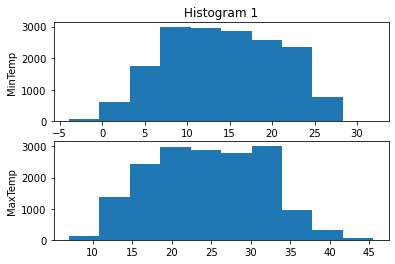

In [44]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.hist([data.MinTemp])
plt.title('Histogram 1')
plt.ylabel('MinTemp')

plt.subplot(2, 1, 2)
plt.hist([data.MaxTemp])
plt.ylabel('MaxTemp')
plt.show()

In [ ]:
plt.subplot(2, 1, 1)
plt.hist([data.Sunshine])
plt.title('Histogram 2')
plt.ylabel('Sunshine')

plt.subplot(2, 1, 2)
plt.hist([data.WindGustSpeed])
plt.ylabel('WindGustSpeed')
plt.show()

In [ ]:
plt.subplot(2, 1, 1)
plt.hist([data.WindSpeed9am])
plt.title('Histogram 3')
plt.ylabel('WindSpeed9am')

plt.subplot(2, 1, 2)
plt.hist([data.WindSpeed3pm])
plt.ylabel('WindSpeed3pm')
plt.show()

In [ ]:
plt.subplot(2, 1, 1)
plt.hist([data.Humidity9am])
plt.title('Histogram 4')
plt.ylabel('Humidity9am')

plt.subplot(2, 1, 2)
plt.hist([data.Humidity3pm])
plt.ylabel('Humidity3pm')
plt.show()

In [ ]:
plt.subplot(2, 1, 1)
plt.hist([data.Pressure9am])
plt.title('Histogram 5')
plt.ylabel('Pressure9am')

plt.subplot(2, 1, 2)
plt.hist([data.Pressure3pm])
plt.ylabel('Pressure3pm')
plt.show()

In [ ]:
plt.subplot(2, 1, 1)
plt.hist([data.Pressure9am])
plt.title('Histogram 6')
plt.ylabel('Pressure9am')

plt.subplot(2, 1, 2)
plt.hist([data.Pressure3pm])
plt.ylabel('Pressure3pm')
plt.show()

In [ ]:
plt.subplot(2, 1, 1)
plt.hist([data.Temp9am])
plt.title('Histogram 7')
plt.ylabel('Temp9am')

plt.subplot(2, 1, 2)
plt.hist([data.Temp3pm])
plt.ylabel('Temp3pm')
plt.show()

Histogram grafiklerini incelediğimizde verilerin büyük kısmının normal dağıldığı gözükmektedir.

In [25]:
data.head()

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Location_Encoded,WindGustDir_Encoded,WindDir9am_Encoded,WindDir3pm_Encoded
0,2009-01-01,Darwin,24.5,31.5,4.2,3.4,WNW,39.0,W,WNW,...,72.0,1004.1,1002.2,29.0,30.5,Yes,3,14,13,14
1,2009-01-01,Townsville,24.8,31.9,6.4,4.8,NNW,39.0,NNW,N,...,69.0,1008.0,1005.4,28.8,29.9,Yes,12,6,6,3
2,2009-01-02,Cairns,23.5,31.6,5.6,10.6,NNE,28.0,SE,NNE,...,70.0,1008.8,1006.8,30.1,30.5,Yes,2,5,9,5
3,2009-01-02,MelbourneAirport,7.8,17.8,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,12.5,15.8,Yes,4,10,12,10
4,2009-01-03,Townsville,25.3,31.3,4.8,4.8,ESE,35.0,N,E,...,70.0,1010.1,1007.5,25.7,29.7,Yes,12,2,3,0


Modelin performansını artırmak açısından Hedef öznetliğimiz için Label;

In [26]:
data['RainToday_Encoder']= label_encoder.fit_transform(data['RainToday'])

Modele sokacağımız dataframe oluşturulması ve Label oluşturduğumuz özniteliklerin çıkartılması;

In [27]:

dt1=data[['Date', 'MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Location_Encoded','WindGustDir_Encoded','WindDir9am_Encoded','WindDir3pm_Encoded','RainToday_Encoder']]

In [28]:
dt1.head()

,Date,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location_Encoded,WindGustDir_Encoded,WindDir9am_Encoded,WindDir3pm_Encoded,RainToday_Encoder
0,2009-01-01,24.5,31.5,4.2,3.4,39.0,24.0,24.0,74.0,72.0,1004.1,1002.2,29.0,30.5,3,14,13,14,1
1,2009-01-01,24.8,31.9,6.4,4.8,39.0,2.0,19.0,77.0,69.0,1008.0,1005.4,28.8,29.9,12,6,6,3,1
2,2009-01-02,23.5,31.6,5.6,10.6,28.0,9.0,11.0,68.0,70.0,1008.8,1006.8,30.1,30.5,2,5,9,5,1
3,2009-01-02,7.8,17.8,7.2,12.9,56.0,31.0,26.0,50.0,43.0,1018.0,1019.3,12.5,15.8,4,10,12,10,1
4,2009-01-03,25.3,31.3,4.8,4.8,35.0,9.0,11.0,90.0,70.0,1010.1,1007.5,25.7,29.7,12,2,3,0,1


Tarih sütununu indexe alınması;

In [29]:
dt1.set_index(keys='Date',inplace=True)

In [30]:
dt1.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location_Encoded,WindGustDir_Encoded,WindDir9am_Encoded,WindDir3pm_Encoded,RainToday_Encoder
Date,,,,,,,,,,,,,,,,,,
2009-01-01,24.5,31.5,4.2,3.4,39.0,24.0,24.0,74.0,72.0,1004.1,1002.2,29.0,30.5,3,14,13,14,1
2009-01-01,24.8,31.9,6.4,4.8,39.0,2.0,19.0,77.0,69.0,1008.0,1005.4,28.8,29.9,12,6,6,3,1
2009-01-02,23.5,31.6,5.6,10.6,28.0,9.0,11.0,68.0,70.0,1008.8,1006.8,30.1,30.5,2,5,9,5,1
2009-01-02,7.8,17.8,7.2,12.9,56.0,31.0,26.0,50.0,43.0,1018.0,1019.3,12.5,15.8,4,10,12,10,1
2009-01-03,25.3,31.3,4.8,4.8,35.0,9.0,11.0,90.0,70.0,1010.1,1007.5,25.7,29.7,12,2,3,0,1


Satır ve Sütun sayısı;

In [31]:
dt1.shape

(16962, 18)

Veri seti içerisinde öznitelik ve hedef sütunlarını belirlenmesi;

In [32]:
# Öznitelikler

X=dt1.iloc[:,:17];X.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location_Encoded,WindGustDir_Encoded,WindDir9am_Encoded,WindDir3pm_Encoded
Date,,,,,,,,,,,,,,,,,
2009-01-01,24.5,31.5,4.2,3.4,39.0,24.0,24.0,74.0,72.0,1004.1,1002.2,29.0,30.5,3,14,13,14
2009-01-01,24.8,31.9,6.4,4.8,39.0,2.0,19.0,77.0,69.0,1008.0,1005.4,28.8,29.9,12,6,6,3
2009-01-02,23.5,31.6,5.6,10.6,28.0,9.0,11.0,68.0,70.0,1008.8,1006.8,30.1,30.5,2,5,9,5
2009-01-02,7.8,17.8,7.2,12.9,56.0,31.0,26.0,50.0,43.0,1018.0,1019.3,12.5,15.8,4,10,12,10
2009-01-03,25.3,31.3,4.8,4.8,35.0,9.0,11.0,90.0,70.0,1010.1,1007.5,25.7,29.7,12,2,3,0


In [33]:
# Hedef

y=dt1.iloc[:,17];y.sum();y.head()

Date
2009-01-01    1
2009-01-01    1
2009-01-02    1
2009-01-02    1
2009-01-03    1
Name: RainToday_Encoder, dtype: int32

Hazırlamış olduğumuz datayı %80 train ve %20 test olarak ayıralım;

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

Train ve Test datalarının uzunlukları;

In [35]:
print('X_train > ',len(X_train))
print('X_test  > ',len(X_test))

X_train >  13569
X_test  >  3393


Aykırı değerlere karşı verilerimizi ölçeklendirmek için RobustScaler kullanıyoruz.
RobustScaler medyanı kaldırır ve verileri nicelik aralığına göre ölçeklendirir.

In [36]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Logistic Regression

# Bağımlı değişken ile bir veya daha fazla bağımsız değişken arasındaki ilişkiyi, 
# temel lojistik fonksiyonunu kullanarak olasılıkları tahmin ederek ölçmektedir.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [38]:
# Support Vector Machine

# Bir sınıfın tüm veri noktalarını ayıran doğrusal karar sınırını bularak verileri sınıflandırır.

from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train, y_train)

SVC()

In [39]:
# DecisionTreeClassifier

# Bir karar ağacı, her düğümün bir özelliği (niteliği) temsil ettiği, her bağlantının (dal) bir kararı temsil
# ettiği ve her bir yapının bir sonucu olduğu bir ağaçtır. Her ağaç düğüm ve dallardan oluşur. Her düğüm, sınıflandırılacak
# olan bir gruptaki özellikleri temsil eder ve her dal, düğümün alabilecğei bir değeri temsil eder.

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
# Naive Bayes
# Her özniteliğin birbirinden koşulsal bağımsız olduğu ve 
# öğrenilmek istenen kavramın tüm bu özniteliklere koşulsal bağlı olduğu bir Bayes ağı oluşturur.

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [41]:
# Accuracy Score

# Accuracy değeri modelde doğru tahmin ettiğimiz alanların toplam veri kümesine oranı ile hesaplanmaktır.

print('[1]Logistic Regression Training Accuracy:', lr.score(X_train, y_train))
print('[2]Support Vector Machine Training Accuracy:', svc.score(X_train, y_train))
print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
print('[4]Naive Bayes Training Accuracy:', gnb.score(X_train, y_train))

[1]Logistic Regression Training Accuracy: 0.8175252413589801
[2]Support Vector Machine Training Accuracy: 0.8535632692165966
[3]Decision Tree Classifier Training Accuracy: 1.0
[4]Naive Bayes Training Accuracy: 0.7660844572186601


Accuracy Score sıralaması 3 > 2 > 1 > 4 olarak gözüküyor.
Accuracy Score bize tek başına kesin sonuç vermez.
Emin olmak açısından diğer performans ölçütlerine de bakmamız gerekiyor.

Oluşturmuş olduğumuz modellerin Confusion Matrix,Classification Report ve Cross Validation sonuçlarına bakalım;

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

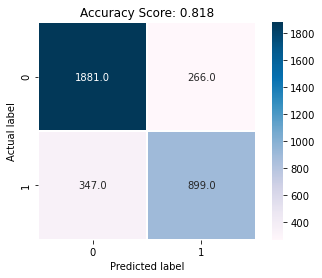

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2147
           1       0.77      0.72      0.75      1246

    accuracy                           0.82      3393
   macro avg       0.81      0.80      0.80      3393
weighted avg       0.82      0.82      0.82      3393

Cross Validation Score >  [0.8109801  0.82166544 0.8238762  0.8109801  0.81422779]
Accuracy Score 0.8175252413589801


In [45]:
# [1]Logistic Regression Model Performans

predictions_lr=lr.predict(X_test)
cm_lr = confusion_matrix(y_test,predictions_lr)
score_lr = round(lr.score(X_train, y_train),3)

sb.heatmap(cm_lr, annot=True, fmt=".1f", linewidths=.3, 
            square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_lr), size = 12)
plt.show()


print(classification_report(y_test,predictions_lr))

print('Cross Validation Score > ',cross_val_score(lr, X_train, y_train, cv=5))
print('Accuracy Score', lr.score(X_train, y_train))

[1]Logistic Regression Modelinin Confusion Matrix tablosunda görüldüğü üzere False Positive=347 , False Negative=266

Precision bize pozitif olarak tahminlediğimiz değerlerin gerçekten kaç adedinin pozitif olduğunu göstermektedir.
Precision 0 için %84 , 1 için %77

Recall pozitif olarak tahmin etmemiz gereken işlemlerin ne kadarını pozitif tahmin ettiğimizi gösterir.
Recall 0 için %88 , 1 için %72

F1 Score değeri precision ve recall değerlerinin harmonik ortalamasıdır.
F1 Score 0 için %86 , 1 için %75

Cross Val ortalaması % 81.4

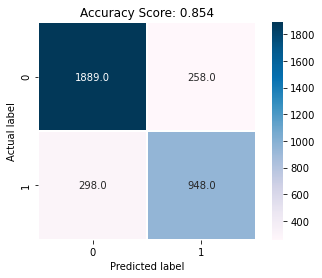

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2147
           1       0.79      0.76      0.77      1246

    accuracy                           0.84      3393
   macro avg       0.82      0.82      0.82      3393
weighted avg       0.84      0.84      0.84      3393

Cross Validation Score >  [0.83861459 0.84450995 0.83308769 0.83492999 0.83339477]
Accuracy Score 0.8535632692165966


In [46]:
# [2]Support Vector Machine Model Performans

predictions_svc=svc.predict(X_test)
cm_svc = confusion_matrix(y_test,predictions_svc)
score_svc = round(svc.score(X_train, y_train),3)

sb.heatmap(cm_svc, annot=True, fmt=".1f", linewidths=.3, 
            square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_svc), size = 12)
plt.show()


print(classification_report(y_test,predictions_svc))

print('Cross Validation Score > ',cross_val_score(svc, X_train, y_train, cv=5))
print('Accuracy Score', svc.score(X_train, y_train))

[2]Support Vector Machine Modelinin Confusion Matrix tablosunda görüldüğü üzere False Positive=298 , False Negative=258

SVC modelimizde F1 Score 0 için %87, 1 için %77 
Cross Val ortalaması % 83.6
Performans ölçütleri Logistic Regression Modelinden daha iyi gözüküyor.

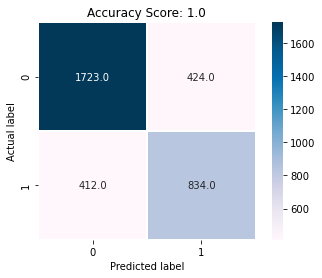

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      2147
           1       0.66      0.67      0.67      1246

    accuracy                           0.75      3393
   macro avg       0.73      0.74      0.74      3393
weighted avg       0.75      0.75      0.75      3393

Cross Validation Score >  [0.75939573 0.74834193 0.7697126  0.75092115 0.76004423]
Accuracy Score 1.0


In [47]:
# [3]Decision Tree Classifier Model Performans

predictions_tree=tree.predict(X_test)
cm_tree = confusion_matrix(y_test,predictions_tree)
score_tree = round(tree.score(X_train, y_train),3)

sb.heatmap(cm_tree, annot=True, fmt=".1f", linewidths=.3, 
            square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_tree), size = 12)
plt.show()


print(classification_report(y_test,predictions_tree))

print('Cross Validation Score > ',cross_val_score(tree, X_train, y_train, cv=5))
print('Accuracy Score', tree.score(X_train, y_train))

[3]Decision Tree Classifier Modelinin Confusion Matrix tablosunda görüldüğü üzere False Positive=399 , False Negative=430

Tree modelimizde F1 Score 0 için %81, 1 için %67 
Cross Val ortalaması % 75.6
Accuracy Score %100

Decision Tree modelimizin Accuracy Score değeri %100 gözüküyor ancak F1 score ve Cross Val değerleri üzerinden bunun hatalı olduğunu anlayabiliyoruz.

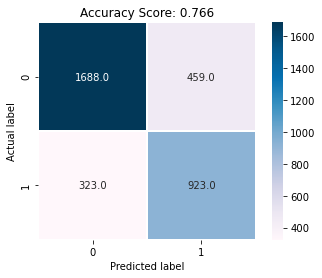

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      2147
           1       0.67      0.74      0.70      1246

    accuracy                           0.77      3393
   macro avg       0.75      0.76      0.76      3393
weighted avg       0.78      0.77      0.77      3393

Cross Validation Score >  [0.76271186 0.766028   0.76934414 0.75792189 0.7714707 ]
Accuracy Score 0.7660844572186601


In [48]:
# [4]Naive Bayes Model Performans

predictions_gnb=gnb.predict(X_test)
cm_gnb = confusion_matrix(y_test,predictions_gnb)
score_gnb = round(gnb.score(X_train, y_train),3)

sb.heatmap(cm_gnb, annot=True, fmt=".1f", linewidths=.3, 
            square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_gnb), size = 12)
plt.show()


print(classification_report(y_test,predictions_gnb))

print('Cross Validation Score > ',cross_val_score(gnb, X_train, y_train, cv=5))
print('Accuracy Score', gnb.score(X_train, y_train))

[4]Naive Bayes Modelinin Confusion Matrix tablosunda görüldüğü üzere False Positive=323 , False Negative=459

SVC modelimizde F1 Score 0 için %81, 1 için %70 
Cross Val ortalaması % 76.4

ROC-AUC

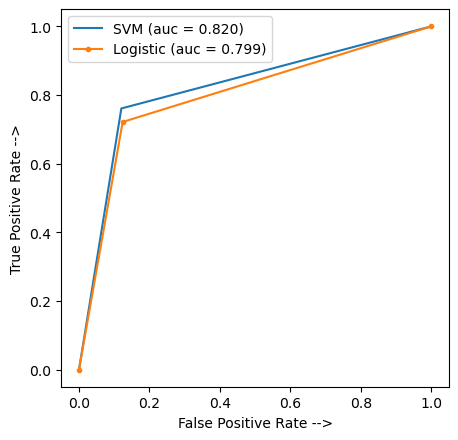

In [49]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, predictions_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, predictions_svc)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

4 modelimize de uygulamış olduğumuz Accuracy Score , Confusion Matrix,F1 Score ve Cross Validation Score performans ölçümleri üzerinden sonuçları incelediğimizde [2]Support Vector Machine modelimizin performansı diğer 3 modelden daha iyi gözükmektedir.

Decision Tree Classifier modelimizin Accuracy Score %100 olmasına rağmen diğer performans ölçümleri üzerinden 4 model arasında en düşük performansa sahip model olduğunu söyleyebiliriz.

Doğruluk oranı en yüksek olan SVC modelimizin performansını arttırmak için hiperparametre optimizasyonu uygulayabiliriz.

Hiper Parametre optimizasyonu için GridSearchCV kullanıyoruz.

In [ ]:
from sklearn.model_selection import GridSearchCV

Optimizasyon için parametrelerin belirlenmesi;

In [ ]:
Param={'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
       'C':[1,52,10],
       'degree':[3,8],
       'coef0':[0.001,10,0.5],
       'gamma':('auto','scale')}

SVC modelimize optimizasyon işlemini uygulayalım.

( Daha önce uyguladığımda en iyi parametre olarak kernel='poly',C=52,degree=3,coef0=10,gamma='scale' vermişti.
Ancak ipynb dosyamı daha sonra bir kaç kez tekrar çalıştırdığımda 4 saat ve 5 saat beklememe rağmen sonuç vermedi.
Bilgisayarımın işlemcisinden kaynaklandığını düşünüyorum.
Bu sebeple bana daha önce vermiş olduğu parametreleri modelime uyguladım.C:52 parametresi saatlerce beklememe rağmen sonuç vermediği için C:5 aldım. )

In [ ]:
SVModel=SVC()
GridS=GridSearchCV(SVModel,param)
GridS.fit(X_train,y_train)

GridS.best_params_  > (kernel='poly',C=5,degree=3,coef0=10,gamma='scale')

In [ ]:
svc_best= SVC(kernel='poly',C=5,degree=3,coef0=10,gamma='scale')
svc_best.fit(X_train, y_train)

İlk SVC Modelimizin performansı;

In [ ]:
svc.score(X_train, y_train)

Optimizasyon işlemi uyguladığımız SVC Modelimizin performansı;

In [ ]:
svc_best.score(X_train, y_train)

Bu çalışmada çeşitli meteorolojik parametreler arasındaki ilişki incelenmiştir.
4 farklı sınıflandırıcı makine öğrenmesi modeli kullanılarak yağmur tahmini yapılmış ve model sonuçları karşılaştırılmıştır.
Analizde kullanılan Support Vector Machine, modeller arasında en başarılısı, en başarısız model ise Decision Tree Classifier modeli olmuştur.
SVC modelimize hiper parametre optimizasyonu uygulayarak performansı arttırılmıştır.